## EJEMPLO

In [1]:
import numpy as np
from scipy.stats import entropy
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# tabla = pd.DataFrame(columns=['a_b','a_b_c', 'a_b_c_d', 'a_b_c_d_e', 'si_no'])

In [3]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=[1,1])

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

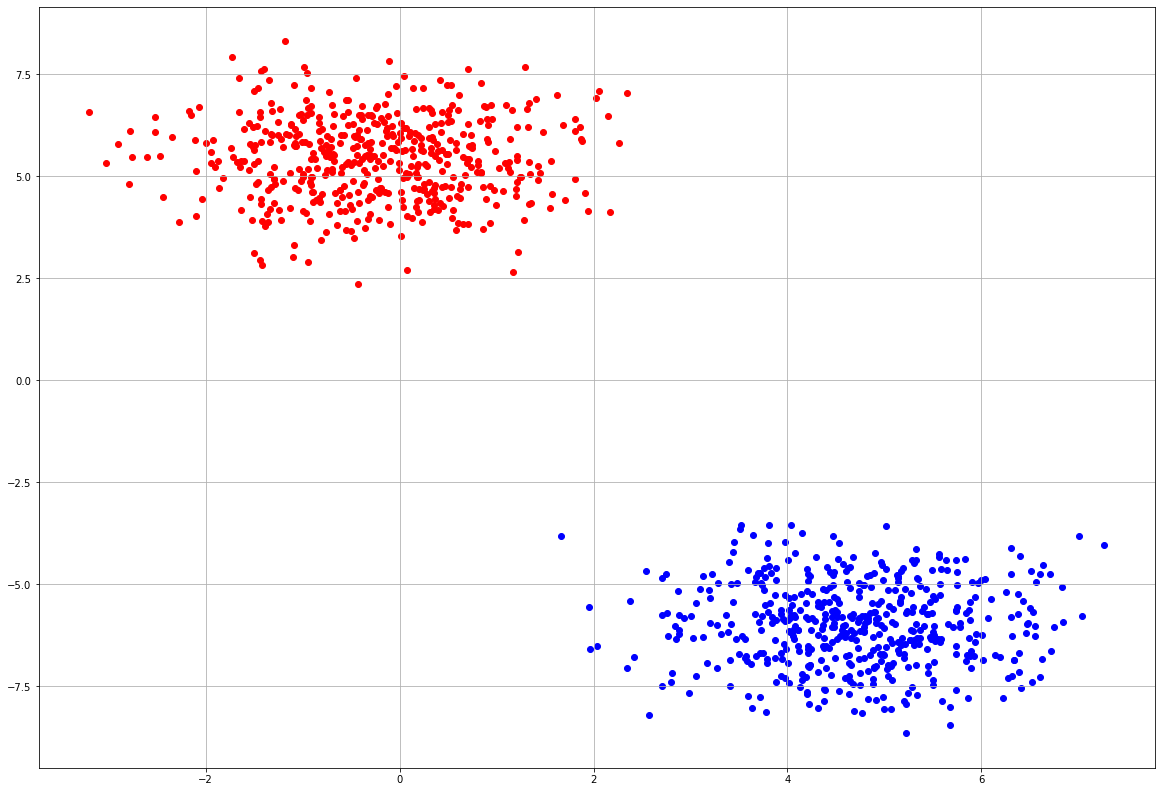

In [5]:
plt.figure(figsize=(20,14))
plt.scatter(X[y==0,0], X[y==0,1], c='b')
plt.scatter(X[y==1,0], X[y==1,1], c='r')
plt.grid()
plt.show()

### NORMALIZACIÓN

In [6]:
scaler = MinMaxScaler()

In [7]:
X = scaler.fit_transform(X)

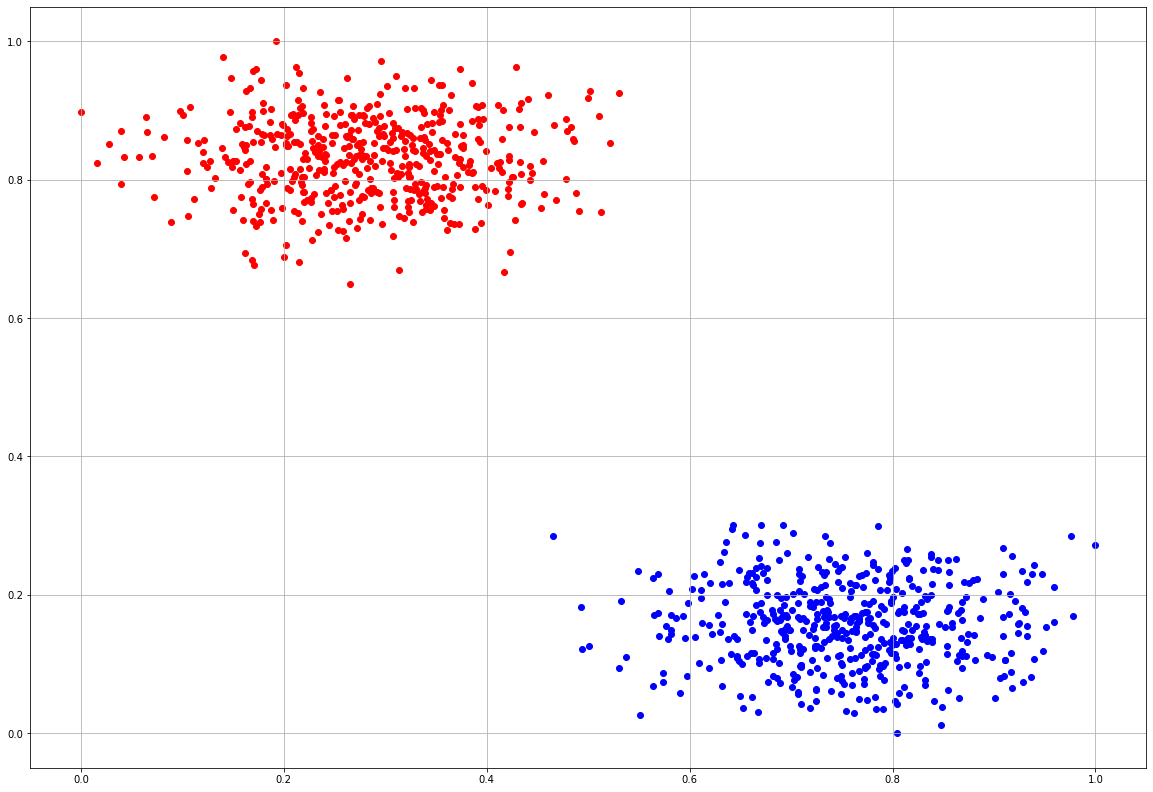

In [8]:
plt.figure(figsize=(20,14))
plt.scatter(X[y==0,0], X[y==0,1], c='b')
plt.scatter(X[y==1,0], X[y==1,1], c='r')
plt.grid()
plt.show()

In [9]:
tabla = pd.DataFrame(columns=['a_b','a_b_c','si_no'], data=np.random.rand(1000,3))
tabla

,a_b,a_b_c,si_no
0,0.722830,0.823237,0.130784
1,0.284566,0.971381,0.473019
2,0.101819,0.993859,0.938647
3,0.004926,0.186992,0.276237
4,0.241514,0.358247,0.534211
...,...,...,...
995,0.431694,0.220190,0.353274
996,0.490746,0.159477,0.048164
997,0.444351,0.145417,0.397111
998,0.724638,0.046551,0.214346


In [10]:
a_b = ['a', 'b']
a_b_c = ['a', 'b', 'c']
si_no = ['no', 'si']

In [11]:
tabla.a_b = [a_b[idx] for idx in np.digitize(X[:,0], bins=[0.5])]

In [12]:
tabla.a_b_c = [a_b_c[idx] for idx in np.digitize(X[:,1], bins=[1/3, 2/3])]

In [13]:
tabla.si_no = [si_no[idx] for idx in np.digitize(y, bins=[0.5])]

In [14]:
tabla

,a_b,a_b_c,si_no
0,b,a,no
1,a,c,si
2,b,a,no
3,a,c,si
4,b,a,no
...,...,...,...
995,a,c,si
996,a,c,si
997,b,a,no
998,a,c,si


In [15]:
H = entropy(tabla.iloc[:, -1].value_counts(normalize=True), base=2)
print(H)

1.0


In [16]:
G = []
l = len(tabla)
for atributo in tabla.columns[:-1]:
    G.append(H)
    for v in tabla[atributo].unique():
        table = tabla.loc[tabla[atributo] == v]
        G[-1] -= (len(table)/l)*entropy(table.iloc[:, -1].value_counts(normalize=True), base=2)
H, G

(1.0, [0.9331343502885158, 1.0])

In [17]:
print("Ganancia MAXIMA en Información (Entropía) =    -", tabla.columns[np.argmax(G)], "-")

Ganancia MAXIMA en Información (Entropía) =    - a_b_c -


In [18]:
Gi = []
G_Gini = 1-sum(tabla.iloc[:,-1].value_counts(normalize=True)**2)
l = len(tabla)
for atributo in tabla.columns[:-1]:
    Gi.append(G_Gini)
    for v in tabla[atributo].unique():
        table = tabla.loc[tabla[atributo] == v]
        Gi[-1] -= (len(table)/l)*(1-sum(table.iloc[:,-1].value_counts(normalize=True)**2))
G_Gini, Gi

(0.5, [0.48413574617193883, 0.5])

In [19]:
print("Ganancia MAXIMA en Información (GINI) =    -", tabla.columns[np.argmax(Gi)], "-")

Ganancia MAXIMA en Información (GINI) =    - a_b_c -
